## Modeling<a id='Modeling'>

## Contents<a id='Contents'></a>
* [Modeling](#Modeling)
  * [Contents](#Contents)
  * [Introduction](#Introduction)
  * [Imports](#Imports)
  * [Summary of baseline logisticRegression model](#summarized_results)
  * [Load Data](#Load_Data)
  * [LogisticRegression algorithm](#logistic_regression)
  * [roc_auc_score and ROC Curve](#roc_related)
* [SMOTE](#smote)
     * [Fitting Logistic Regression after SMOTE](#logreg_smote)
     * [Fitting RandomForest classifier after SMOTE](#rfc_smote)
     * [Fitting AdaBoost classifier after SMOTE](#adaboost_smote)
* [Undersampling](#undersampling) 
    * [Fitting LogisticRegression with undersampling](#logreg_undersample)
    * [Fitting RandomForest Classifier with undersampling](#rfc_undersampling)
    * [Fitting AdaBoost Classifier with undersampling](#abc_undersampling)
* [Summarized classification reports for 3 algorithms](#summary_charts_all)

### Introduction<a id='Introduction'>

* In the first round of
the modeling notebook use the probability output and
a threshold other than 0.5, which is the default.
* I am choosing binary model first.<br/>
<b>We will follow the same pattern we used before, only this time we are explicitly defining two objects ``X`` and ``y``, which were defined implicitly when we built the first model</b>. 

    
Thus, pattern defined above can be expanded as follows:

> (a) Define ``X`` and ``y``  

> (b) Perform train/test split on ``(X, y)``  

> (c) Create an object of the class associated with the algorithm to be used--in this case ``LogisticRegression``  

> (d) Build an actual model using the``fit`` method from the class associated with the algorithm 
to be used (using the training set)  

> (e) Predict with the built model using the``predict`` method from the class (training set and test set)  

> (f) Compute performance metrics (in this case, accuracy) for the training and test predictions. The metrics to be used and their interpretation will depend on the application at hand  

> (g) Determine if the model can be improved--repeat as needed with additional algorithms and/or by applying hyper-parameter tuning  

> (h) Compare and Combine all best models as needed

### Imports<a id='Imports'>

In [138]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate
from library.sb_utils import save_file

import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
import nltk
# Remove tokens that do not contain any letters from words_tokenized
import re
from nltk.stem.snowball import SnowballStemmer
# Create an English language SnowballStemmer object
stemmer = SnowballStemmer("english")
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from numpy import arange
from numpy import argmax
#reasampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
#
print("Loaded Libraries")
import warnings
warnings.simplefilter("ignore")

Loaded Libraries


## Summary of baseline logisticRegression model<a id='summarized_results'>

<table style="background-color: #D6EEEE">
    <tr><th>Model</th><th>classes</th><th>Precision</th><th>Recall</th><th>f1-score</th><th>support</th></tr>
    <tr><td rowspan="3">MultiClass LogReg Training</td><td>0</td><td>0.89</td><td>0.99</td><td>0.94</td><td>12387</td></tr>
    <tr><td>1</td><td>0.86</td><td>0.71</td><td>0.78</td><td>1790</td></tr>
    <tr><td>2</td><td>0.76</td><td>0.25</td><td>0.38</td><td>1580</td></tr>
    <tr><th>accuracy</th><th colspan="4">0.89</th><th>15757</th></tr>
    <tr><td rowspan="3">MultiClass LogReg Test Set</td><td>0</td><td>0.88</td><td>0.99</td><td>0.93</td><td>3097</td></tr>
    <tr><td>1</td><td>0.77</td><td>0.60</td><td>0.67</td><td>448</td></tr>
    <tr><td>2</td><td>0.61</td><td>0.19</td><td>0.29</td><td>395</td></tr>
    <tr><th>accuracy</th><th colspan="4">0.86</th><th>3940</th></tr>
    <tr><td rowspan="2">Binary LogReg Training</td><td>0</td><td>0.95</td><td>0.99</td><td>0.97</td><td>13967</td></tr>
    <tr><td>1</td><td>0.91</td><td>0.55</td><td>0.68</td><td>1790</td></tr>
    <tr><th>accuracy</th><th colspan="4">0.94</th><th>15757</th></tr>
    <tr><td rowspan="2">Binary LogReg Test Set</td><td>0</td><td>0.93</td><td>0.99</td><td>0.96</td><td>3492</td></tr>
    <tr><td>1</td><td>0.81</td><td>0.46</td><td>0.59</td><td>448</td></tr>
    <tr><th>accuracy</th><th colspan="4">0.93</th><th>3940</th></tr>
    </table>

Note: if we observe the summary chart, we can see that recall score is low for the minority class. One possible reason is calsses are hihgly imbalanced. TO take care of that, I will apply sampling method(one undersampling and one oversampling method) for two models that I choose. 

### Load Data<a id='Load_Data'>

In [8]:
df_main = pd.read_csv('cp2_ppt_2_sentiment_df.csv')

In [9]:
df_main.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,review_id,user_id,yelp_review_stars,useful,funny,cool,text,date,year,text_length
0,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",WeTHLEdLdP3Y3AXWWCsx4g,UizCd11Qoo74BKARrZp7HA,5,0,0,1,We are visiting in Philadelphia from Californi...,2018-05-28 21:27:38,2018,614
1,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",MrWpfvjVA6Qtj3CDvFfPiA,49aswoS-d09tyWNJimzZ5A,5,1,0,0,Delicious food ! I personally loved it !!!\n\n...,2018-02-01 19:28:41,2018,573
2,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",hll3PKZbMbu2W7uFbF8ezQ,CmLK8cjvcUIKyNVMp8ZyDA,2,0,0,0,Beautiful place. Excellent food. I only gave i...,2018-08-24 13:30:41,2018,362
3,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",Mi5lScAdCWuJZj0QO_4qxg,wG77jgwRg53rN1KVxo637w,2,0,0,0,"It's extremely overpriced, and the sandwiches ...",2018-02-11 18:04:01,2018,254
4,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",SSu94Tvc6L5UBC4FDDyAbw,5s0nTuLRm3ue4Qfrj9PHkQ,5,0,0,0,Instagram worthy and Claire is an amazing serv...,2018-05-28 23:07:50,2018,1167


In [10]:
# Create new column "target_binary" that stored 0's or 1's. 0 being Positive, 1 being Non-Positive
df_main["target_binary"] = np.where(df_main["yelp_review_stars"] >= 3, 0, 1)
df_main.head(3)

,business_id,name,address,city,state,postal_code,latitude,longitude,review_count,categories,...,user_id,yelp_review_stars,useful,funny,cool,text,date,year,text_length,target_binary
0,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,UizCd11Qoo74BKARrZp7HA,5,0,0,1,We are visiting in Philadelphia from Californi...,2018-05-28 21:27:38,2018,614,0
1,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,49aswoS-d09tyWNJimzZ5A,5,1,0,0,Delicious food ! I personally loved it !!!\n\n...,2018-02-01 19:28:41,2018,573,0
2,vUrTGX_7HxqeoQ_6QCVz6g,Suraya,1528 Frankford Ave,Philadelphia,PA,19125,39.973687,-75.133956,1121,"Active Life, Beer Gardens, Grocery, Middle Eas...",...,CmLK8cjvcUIKyNVMp8ZyDA,2,0,0,0,Beautiful place. Excellent food. I only gave i...,2018-08-24 13:30:41,2018,362,1


In [16]:
# Picking the only text and target column
df_bi_final = df_main[['text','target_binary']]

In [17]:
df_bi_final.head()

,text,target_binary
0,We are visiting in Philadelphia from Californi...,0
1,Delicious food ! I personally loved it !!!\n\n...,0
2,Beautiful place. Excellent food. I only gave i...,1
3,"It's extremely overpriced, and the sandwiches ...",1
4,Instagram worthy and Claire is an amazing serv...,0


In [18]:
import re 
def function_clean(text):
    text = re.sub(r"http\S+", "", text) #removing the URL Http
    # Removal of mentions
    text = re.sub("@[^\s]*", "", text)
    # Removal of hashtags
    text = re.sub("#[^\s]*", "", text)
    # Removal of numbers
    text = re.sub('[0-9]*[+-:]*[0-9]+', '', text)
    text = re.sub("(\\d|\\W)+"," ",text)
    text = re.sub("'s", "", text)   
    return text

In [23]:
# Define a function to perform both stemming and tokenization


def tokenize_and_stem(text):

    tokens = [y for x in nltk.sent_tokenize(text) for y in nltk.word_tokenize(x)]

    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]',token)]

    stems = [stemmer.stem(token) for token in filtered_tokens]

    return stems

In [19]:
# applying the cleaning function to text column
df_bi_final['text'] = df_bi_final['text'].apply(lambda text: function_clean(text))

In [20]:
df_bi_final.head()

,text,target_binary
0,We are visiting in Philadelphia from Californi...,0
1,Delicious food I personally loved it I was sur...,0
2,Beautiful place Excellent food I only gave it ...,1
3,It s extremely overpriced and the sandwiches a...,1
4,Instagram worthy and Claire is an amazing serv...,0


In [21]:
X_train,X_test,y_train,y_test = train_test_split(df_bi_final['text'], df_bi_final['target_binary'], random_state=2, test_size=0.2, stratify = df_bi_final['target_binary'])

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((15757,), (3940,), (15757,), (3940,))

In [24]:
# Instantiate TfidfVectorizer object with stopwords and tokenizer
# parameters for efficient processing of text

tfidf = TfidfVectorizer(stop_words='english',tokenizer=tokenize_and_stem,ngram_range=(1,1))

In [25]:
X_train_transformed = tfidf.fit_transform(X_train)

In [26]:
type(X_train_transformed)

scipy.sparse.csr.csr_matrix

In [29]:
X_test_transformed = tfidf.transform(X_test)

In [30]:
type(X_test_transformed)

scipy.sparse.csr.csr_matrix

## LogisticRegression algorithm<a id='logistic_regression'>
    
Logistic Regression algorithm is ussed to build models that are simple and yet effecive--in some cases. This algorithm can be used to build useful baseline models for classification problems that can be easily interpreted. For these reasons, Logistic Regression is considered as one of the fundamental Machine Learning algorithms associated with classification problems.

In [36]:
# fit a model
clf = LogisticRegression()
clf.fit(X_train_transformed, y_train)
# predict labels
y_pred = model.predict(X_test_transformed)


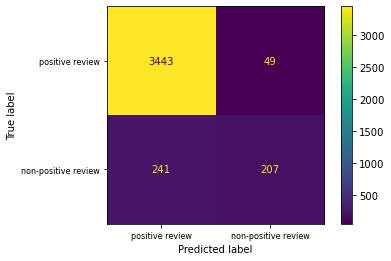

In [38]:
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['positive review', 'non-positive review'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
ax.set_yticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
display_cm.plot(ax = ax)

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      3492
           1       0.81      0.46      0.59       448

    accuracy                           0.93      3940
   macro avg       0.87      0.72      0.77      3940
weighted avg       0.92      0.93      0.92      3940



## roc_auc_score and ROC Curve<a id='roc_related'>

Another common metric is AUC, area under the receiver operating characteristic (ROC) curve. The Reciever operating characteristic curve plots the true positive (TP) rate versus the false positive (FP) rate at different classification thresholds. The thresholds are different probability cutoffs that separate the two classes in binary classification. It uses probability to tell us how well a model separates the classes.

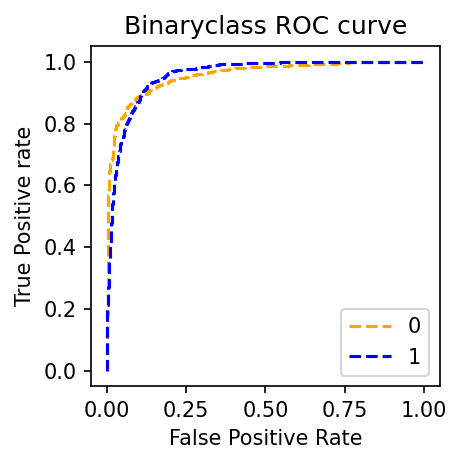

In [105]:

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 2

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_proba[:,i], pos_label=i)
    
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='0')
plt.plot(fpr[1], tpr[1], linestyle='--',color='blue', label='1')

plt.title('Binaryclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Binary Class ROC',dpi=300); 

In [118]:
roc_auc_score(y_test, clf.predict_proba(X_test_transformed)[:, 1])

0.9573444659221076

In [122]:
roc_auc_score(y_train, clf.predict_proba(X_train_transformed)[:, 1])

0.9818124965751274

Before applying resampling method, I will try to fit two more models namels RandomForestClassifier and AdaBoost

## Applying two algorithm before sampling<a id='apply_before sampling'>

## RandomForest Classifier Algorithm<a id='random_algorithm_before_sampling'>
    
   Follows Bootstrap Aggregation method - Bagging

In [127]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train_transformed,y_train)
y_pred_rfc = rfc_model.predict(X_test_transformed)


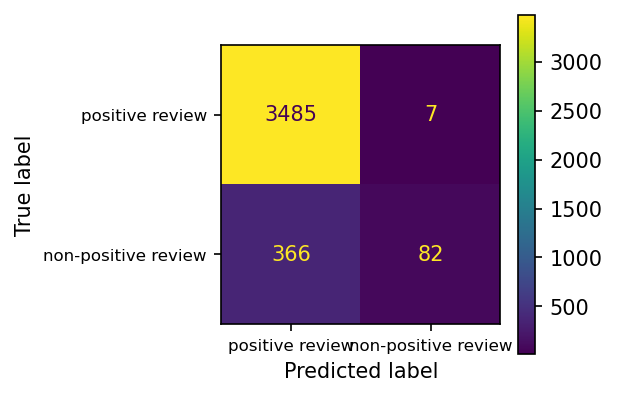

In [128]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc, labels = rfc_model.classes_)
_, ax = plt.subplots()
display_cm_rfc = ConfusionMatrixDisplay(confusion_matrix = cm_rfc, 
                                    display_labels = ['positive review', 'non-positive review'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
ax.set_yticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
display_cm_rfc.plot(ax = ax)

In [129]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      3492
           1       0.92      0.18      0.31       448

    accuracy                           0.91      3940
   macro avg       0.91      0.59      0.63      3940
weighted avg       0.91      0.91      0.88      3940



## AdaBoost Classifier Algorithm<a id='adaboost_algorithm_before_sampling'>
     Boosting Method
    AdaBoost - Adaptive Boosting ALgorithm

In [130]:
from sklearn.ensemble import AdaBoostClassifier

In [134]:
# Create adaboost classifer object
abc_model = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
# Train Adaboost Classifer
abc_model.fit(X_train_transformed, y_train)

#Predict the response for test dataset
y_pred_abc = abc_model.predict(X_test_transformed)

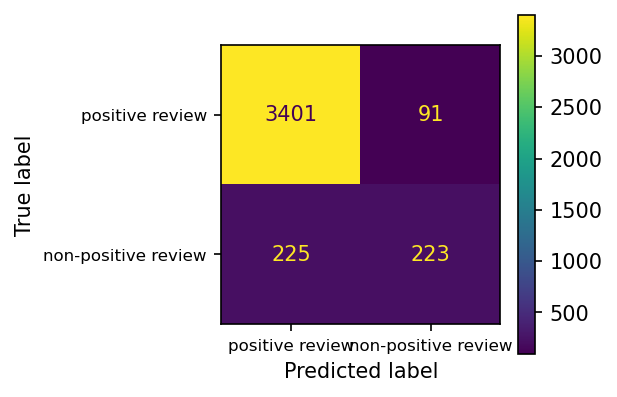

In [135]:
cm_abc = confusion_matrix(y_test, y_pred_abc, labels = abc_model.classes_)
_, ax = plt.subplots()
display_cm_abc = ConfusionMatrixDisplay(confusion_matrix = cm_abc, 
                                    display_labels = ['positive review', 'non-positive review'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
ax.set_yticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
display_cm_abc.plot(ax = ax)

In [136]:
print(classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3492
           1       0.71      0.50      0.59       448

    accuracy                           0.92      3940
   macro avg       0.82      0.74      0.77      3940
weighted avg       0.91      0.92      0.91      3940



### Summary of three models - before any sampling techniques

<table>
    <tr><th>Model</th><th>classes</th><th>Precision</th><th>Recall</th><th>f1-score</th><th>support</th></tr>
   <tr><td rowspan="2">Before sampling - LogisticRegression</td><td>0</td><td>0.93</td><td>0.99</td><td>0.96</td><td>3492</td></tr>
   
   <tr><td>1</td><td>0.81</td><td>0.46</td><td>0.59</td><td>448</td></tr>
    <tr><th>accuracy</th><th colspan="4">0.93</th><th>3940</th></tr>
    <tr><td rowspan="2">Before sampling - RandomForest</td><td>0</td><td>0.90</td><td>1.00</td><td>0.95</td><td>3492</td></tr>
    <tr><td>1</td><td>0.92</td><td>0.18</td><td>0.31</td><td>448</td></tr>
    <tr><th>accuracy</th><th colspan="4">0.91</th><th>3940</th></tr>
    <tr><td rowspan="2">Before sampling - AdaBoost</td><td>0</td><td>0.94</td><td>0.97</td><td>0.96</td><td>3492</td></tr>
    <tr><td>1</td><td>0.71</td><td>0.50</td><td>0.59</td><td>448</td></tr>
    <tr><th>accuracy</th><th colspan="4">0.92</th><th>3940</th></tr>  
</table>

WE have to increase the Recall score. For that, we need to balance our target classes. We have a hunge target imbalance where positie classes(class 0) is 89% and negative classes (class 1) is 11%. I will apply one undersampling and one oversampling technique and test it for each model and then compare their recall scores and overall predcition score.

Let us apply oversampling method first. I wil use SMOTE.

## SMOTE<a id='smote'>

In [139]:
#Binary SMOTE the training data
sm = SMOTE(random_state=1)
X_2_bal, y_2_bal = sm.fit_resample(X_train_transformed, y_train)

In [140]:
y_2_bal.value_counts()

0    13967
1    13967
Name: target_binary, dtype: int64

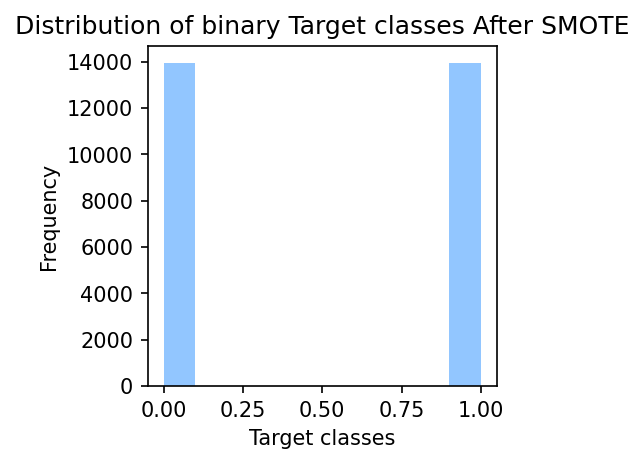

In [141]:
ax=y_2_bal.hist(grid=False)
ax.set_xlabel('Target classes')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of binary Target classes After SMOTE')
plt.show()

## Fitting Logistic Regression with SMOTE<a id='logreg_smote'>

In [143]:
# Fitting Logistic regression to the training set
logreg_sm = LogisticRegression(solver='lbfgs',random_state=1)
logreg_sm.fit(X_2_bal, y_2_bal)

#predict train and test set

pred_labels_sm_train_logit = logreg_sm.predict(X_2_bal)
pred_labels_sm_logit = logreg_sm.predict(X_test_transformed)

# Training score
print(f"Score on training set: {logreg_sm.score(X_train_transformed,y_train)}")
print(f"Score on test set: {logreg_sm.score(X_test_transformed,y_test)}")

Score on training set: 0.9393920162467475
Score on test set: 0.9027918781725889


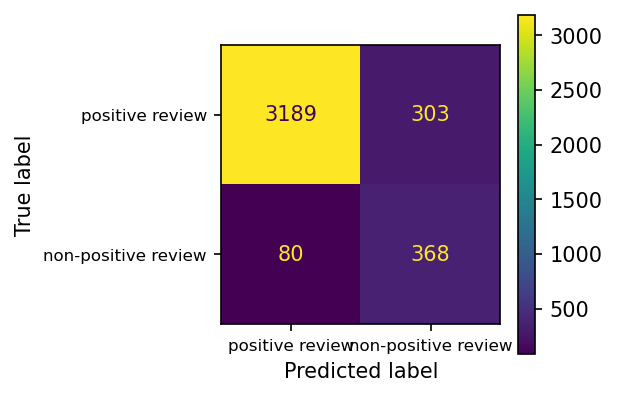

In [144]:
cm_sm = confusion_matrix(y_test, pred_labels_sm_logit, labels = logreg_sm.classes_)
_, ax = plt.subplots()
display_cm_sm = ConfusionMatrixDisplay(confusion_matrix = cm_sm, 
                                    display_labels = ['positive review', 'non-positive review'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
ax.set_yticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
display_cm_sm.plot(ax = ax)

In [147]:
print(classification_report(y_test, pred_labels_sm_logit))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      3492
           1       0.55      0.82      0.66       448

    accuracy                           0.90      3940
   macro avg       0.76      0.87      0.80      3940
weighted avg       0.93      0.90      0.91      3940



Based on the above results, I can say that the recall score on the test set improved by 2x from 0.46 to 0.82. Accuracy did drop a bit.

## Fitting RandomForest classifier with SMOTE<a id='rfc_smote'>

In [148]:
rfc_sm_model = RandomForestClassifier()
rfc_sm_model.fit(X_2_bal,y_2_bal)
y_pred_sm_rfc = rfc_sm_model.predict(X_test_transformed)

# Training score
print(f"Score on training set: {rfc_sm_model.score(X_train_transformed,y_train)}")
print(f"Score on test set: {rfc_sm_model.score(X_test_transformed,y_test)}")

Score on training set: 0.9996826807133338
Score on test set: 0.9197969543147209


In [149]:
print(classification_report(y_test, y_pred_sm_rfc))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      3492
           1       0.71      0.50      0.59       448

    accuracy                           0.92      3940
   macro avg       0.82      0.74      0.77      3940
weighted avg       0.91      0.92      0.91      3940



Random Foret Classifier performed very good with SMOTE. Recall imporved a lot from 0.18 to 0.5 and accuracy also increased by 0.01.

## Fitting AdaBoost classifier with SMOTE<a id='adaboost_smote'>

In [150]:
abc_sm_model = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
abc_sm_model.fit(X_2_bal,y_2_bal)
y_pred_abc_sm_rfc = abc_sm_model.predict(X_test_transformed)

# Training score
print(f"Score on training set: {abc_sm_model.score(X_train_transformed,y_train)}")
print(f"Score on test set: {abc_sm_model.score(X_test_transformed,y_test)}")

Score on training set: 0.8817668337881577
Score on test set: 0.8758883248730964


In [151]:
print(classification_report(y_test, y_pred_abc_sm_rfc))

              precision    recall  f1-score   support

           0       0.96      0.89      0.93      3492
           1       0.47      0.74      0.58       448

    accuracy                           0.88      3940
   macro avg       0.72      0.82      0.75      3940
weighted avg       0.91      0.88      0.89      3940



Recall certainly improved from 0.5 to 0.74. However, accuracy dropped down by 0.04 points. 

## Undersampling<a id='undersampling'>

In [152]:

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train_transformed, y_train)

In [153]:
y_res.value_counts()

0    1790
1    1790
Name: target_binary, dtype: int64

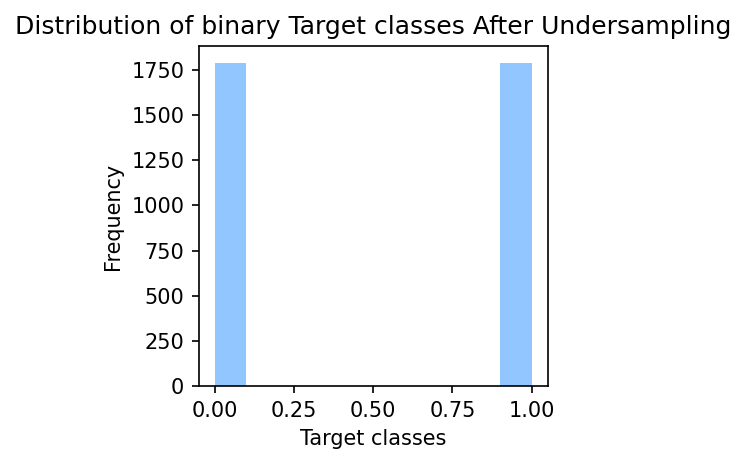

In [154]:
ax=y_res.hist(grid=False)
ax.set_xlabel('Target classes')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of binary Target classes After Undersampling')
plt.show()

## Fitting Logistic Regression with Undersampling<a id='logreg_undersample'>

In [157]:
# Fitting Logistic regression to the training set
logreg_us = LogisticRegression(solver='lbfgs',random_state=1)
logreg_us.fit(X_res, y_res)

#predict train and test set

pred_labels_us_train_logit = logreg_us.predict(X_res)
pred_labels_us_logit = logreg_us.predict(X_test_transformed)

# Training score
print(f"Score on training set: {logreg_us.score(X_train_transformed,y_train)}")
print(f"Score on test set: {logreg_us.score(X_test_transformed,y_test)}")

Score on training set: 0.8951577076854731
Score on test set: 0.8763959390862944


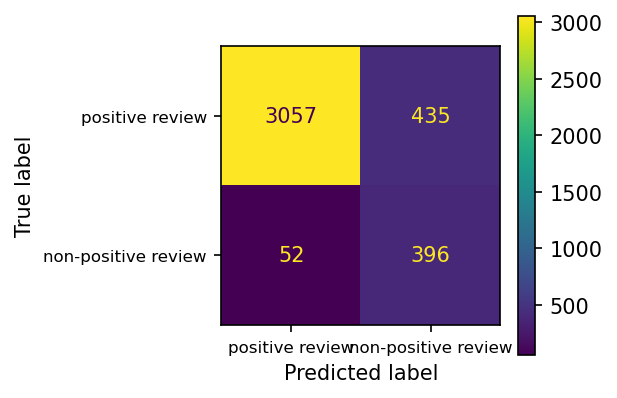

In [159]:
cm_us = confusion_matrix(y_test, pred_labels_us_logit, labels = logreg_us.classes_)
_, ax = plt.subplots()
display_cm_us = ConfusionMatrixDisplay(confusion_matrix = cm_us, 
                                    display_labels = ['positive review', 'non-positive review'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
ax.set_yticklabels(labels = ['positive review', 'non-positive review'], fontsize = 8)
display_cm_us.plot(ax = ax)

In [158]:
print(classification_report(y_test, pred_labels_us_logit))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      3492
           1       0.48      0.88      0.62       448

    accuracy                           0.88      3940
   macro avg       0.73      0.88      0.77      3940
weighted avg       0.93      0.88      0.89      3940



## Fitting RandomForest Classifier with undersampling<a id='rfc_undersampling'>

In [160]:
rfc_us_model = RandomForestClassifier()
rfc_us_model.fit(X_res,y_res)
y_pred_us_rfc = rfc_us_model.predict(X_test_transformed)

# Training score
print(f"Score on training set: {rfc_us_model.score(X_train_transformed,y_train)}")
print(f"Score on test set: {rfc_us_model.score(X_test_transformed,y_test)}")

Score on training set: 0.8855112013708193
Score on test set: 0.8555837563451777


In [161]:
print(classification_report(y_test, y_pred_us_rfc))

              precision    recall  f1-score   support

           0       0.98      0.85      0.91      3492
           1       0.43      0.88      0.58       448

    accuracy                           0.86      3940
   macro avg       0.71      0.87      0.75      3940
weighted avg       0.92      0.86      0.88      3940



## Fitting AdaBoost Classifier with undersampling<a id='abc_undersampling'>

In [162]:
abc_us_model = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)
abc_us_model.fit(X_res,y_res)
y_pred_abc_us_rfc = abc_us_model.predict(X_test_transformed)

# Training score
print(f"Score on training set: {abc_us_model.score(X_train_transformed,y_train)}")
print(f"Score on test set: {abc_us_model.score(X_test_transformed,y_test)}")

Score on training set: 0.839246049374881
Score on test set: 0.8309644670050761


In [163]:
print(classification_report(y_test, y_pred_abc_us_rfc))

              precision    recall  f1-score   support

           0       0.97      0.83      0.90      3492
           1       0.39      0.83      0.53       448

    accuracy                           0.83      3940
   macro avg       0.68      0.83      0.71      3940
weighted avg       0.91      0.83      0.86      3940



## Summarized classification reports for 3 algorithms<a id='summary_charts_all'>

<table>
<tr><th>Model</th><th>Sampling Technique</th><th>classes</th><th>Precision</th><th>Recall</th><th>f1-score</th><th>support</th></tr>
    <tr><td rowspan="3">LogisticRegression</td><td>No technique(imbalanced)</td><td>1</td><td>0.81</td><td>0.46</td><td>0.59</td><td>448</td></tr>
    <tr><td>SMOTE</td><td>1</td><td>0.55</td><td>0.82</td><td>0.66</td><td>448</td></tr>
<tr><td>Undersampling</td><td>1</td><td>0.48</td><td>0.88</td><td>0.62</td><td>448</td></tr>
<tr><th>accuracy before</th><th colspan="5">0.93</th><th>3940</th></tr>
<tr><th>accuracy After SMOTE</th><th colspan="5">0.90</th><th>3940</th></tr>
<tr><th>accuracy After Undersampling</th><th colspan="5">0.88</th><th>3940</th></tr>
    <tr><td rowspan="3">RandomForest</td><td>No technique(imbalanced)</td><td>1</td><td>0.92</td><td>0.18</td><td>0.31</td><td>448</td></tr>
<tr><td>SMOTE</td><td>1</td><td>0.71</td><td>0.50</td><td>0.59</td><td>448</td></tr>
<tr><td>Undersampling</td><td>1</td><td>0.43</td><td>0.88</td><td>0.58</td><td>448</td></tr>
<tr><th>accuracy before</th><th colspan="5">0.91</th><th>3940</th></tr>
<tr><th>accuracy After SMOTE</th><th colspan="5">0.92</th><th>3940</th></tr>
<tr><th>accuracy After Undersampling</th><th colspan="5">0.86</th><th>3940</th></tr>
    <tr><td rowspan="3">AdaBoost</td><td>No technique(imbalanced)</td><td>1</td><td>0.71</td><td>0.50</td><td>0.59</td><td>448</td></tr>
    <tr><td>SMOTE</td><td>1</td><td>0.47</td><td>0.74</td><td>0.58</td><td>448</td></tr>
<tr><td>Undersampling</td><td>1</td><td>0.39</td><td>0.83</td><td>0.53</td><td>448</td></tr>
<tr><th>accuracy before</th><th colspan="5">0.92</th><th>3940</th></tr> 
<tr><th>accuracy After SMOTE</th><th colspan="5">0.88</th><th>3940</th></tr>
<tr><th>accuracy After Undersampling</th><th colspan="5">0.83</th><th>3940</th></tr>


</table>

Based on the above observations, SMOTE seems to be a better choice for resampling. Regarding Model, RandomForest and LogisticRegression are performing well in their accuracy score. 